## DATA CLEANING

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

# Create dataframe from boxing data csv 'bouts_out_new.csv'

df = pd.read_csv('bouts_out_new.csv')

# Limit the Dataframe to those rows where all physical attribute columns are non-null.

df = df[df.loc[:,'age_A':'weight_B'].notnull().all(1)]

# Create a dictionary with each numerical column name, and the acceptable range of values for that column.

num_cols_dict = {col: (df[col].quantile(0.01), df[col].quantile(0.99)) for col in df.describe().columns}

# Use the col_ranges dictionary to replace all unacceptable values with NaN, 
# and then fill the NaN values with the median of each column.

for col in num_cols_dict.keys():
    df[col] = df[col].where((df[col] >= num_cols_dict[col][0]) & (df[col] <= num_cols_dict[col][1]))
    df[col] = df[col].fillna(df[col].median())
    
# Remove the "stance" column, as there are too many null values. 
# Remove the "judge" columns, since the "result" column already denotes the winner.

df = df.drop(['stance_A','stance_B','judge1_A', 'judge1_B', 'judge2_A', 'judge2_B','judge3_A','judge3_B'], axis=1)

# Remove any rows where the "kos" for any boxer is greater than his "wins"

df = df[(df['won_A']>=df['kos_A']) & (df['won_B']>=df['kos_B'])]

df.head()

,age_A,age_B,height_A,height_B,reach_A,reach_B,weight_A,weight_B,won_A,won_B,lost_A,lost_B,drawn_A,drawn_B,kos_A,kos_B,result,decision
0,35.0,27.0,179.0,175.0,178.0,179.0,160.0,160.0,37.0,49.0,0.0,1.0,0.0,1.0,33.0,34.0,draw,SD
1,26.0,31.0,175.0,185.0,179.0,185.0,164.0,164.0,48.0,50.0,1.0,2.0,1.0,1.0,34.0,32.0,win_A,UD
3,25.0,29.0,175.0,174.0,179.0,180.0,155.0,155.0,46.0,31.0,1.0,3.0,1.0,0.0,32.0,19.0,win_A,KO
6,23.0,31.0,175.0,175.0,179.0,188.0,155.0,155.0,43.0,19.0,1.0,1.0,1.0,2.0,31.0,12.0,win_A,SD
10,22.0,28.0,175.0,177.0,179.0,175.0,154.0,153.0,40.0,30.0,0.0,4.0,1.0,0.0,29.0,18.0,win_A,TKO


## EXPLORATORY DATA ANALYSIS: EXPLORE DISTRIBUTION OF WINS

win_A    5864
win_B     959
draw      282
Name: result, dtype: int64

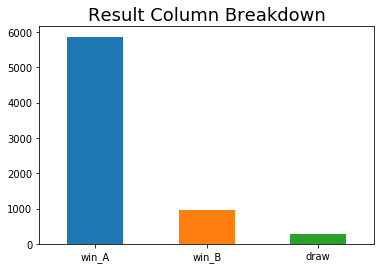

In [4]:
# Explore the distribution of wins

df['result'].value_counts().plot(kind='bar', rot=0)
plt.title('Result Column Breakdown', fontsize=18)
df['result'].value_counts()

In [5]:
# Remove all rows where the result is 'draw,' since these entries only make up about 4% of the results.

df = df[df['result'] != 'draw']

## EXPLORATORY DATA ANALYSIS: EXPLORE PHYSICAL ATTRIBUTE DIFFERENTIALS

In [6]:
# Create columns describing the knockout percentage of the two boxers

df['percent_kos_A'] = np.where(df['won_A']>0, df['kos_A'] / df['won_A'] * 100, 0)
df['percent_kos_B'] = np.where(df['won_B']>0, df['kos_B'] / df['won_B'] * 100, 0)

# Create columns for the differentials between the ages, heights, weights, reaches, and kncokout percentages 
# between Boxer A and Boxer B.

df['diff_age'] = df['age_A'] - df['age_B']
df['diff_height'] = df['height_A'] - df['height_B']
df['diff_weight'] = df['weight_A'] - df['weight_B']
df['diff_reach'] = df['reach_A'] - df['reach_B']
df['diff_ko_percentage'] = df['percent_kos_A'] - df['percent_kos_B']

Text(0,0.5,'Difference in K.O. Percentage')

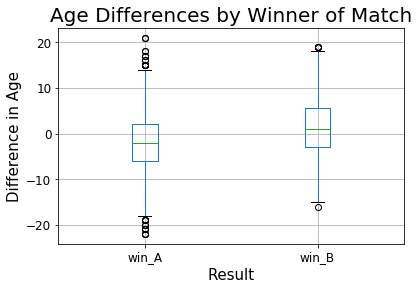

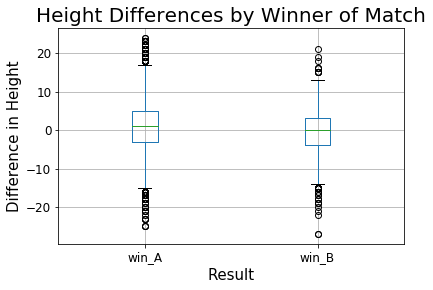

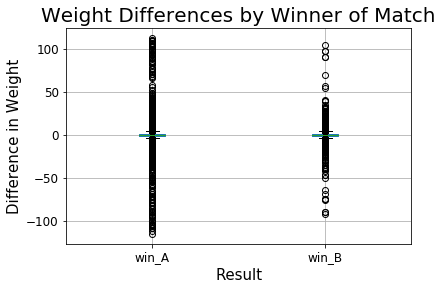

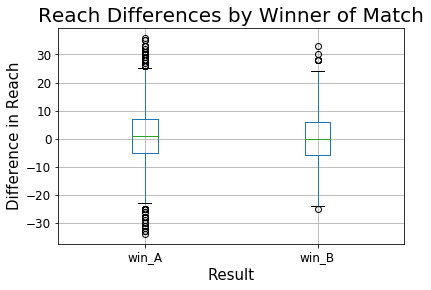

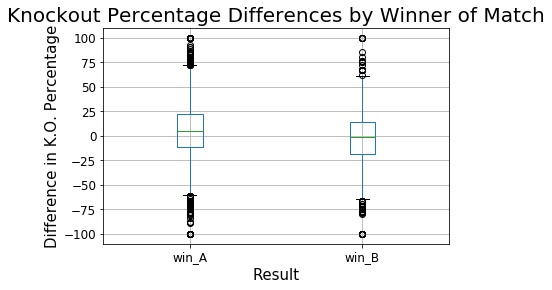

In [7]:
# Create boxplots showing the distribution of the above 4 columns, separated by the result of the match.

df.boxplot(column = 'diff_age', by ='result', fontsize=12)
plt.suptitle('')
plt.title('Age Differences by Winner of Match', fontsize=20)
plt.xlabel('Result', fontsize=15)
plt.ylabel('Difference in Age', fontsize=15)

df.boxplot(column = 'diff_height', by ='result', fontsize=12)
plt.suptitle('')
plt.title('Height Differences by Winner of Match', fontsize=20)
plt.xlabel('Result', fontsize=15)
plt.ylabel('Difference in Height', fontsize=15)

df.boxplot(column = 'diff_weight', by ='result', fontsize=12)
plt.suptitle('')
plt.title('Weight Differences by Winner of Match', fontsize=20)
plt.xlabel('Result', fontsize=15)
plt.ylabel('Difference in Weight', fontsize=15)

df.boxplot(column = 'diff_reach', by ='result', fontsize=12)
plt.suptitle('')
plt.title('Reach Differences by Winner of Match', fontsize=20)
plt.xlabel('Result', fontsize=15)
plt.ylabel('Difference in Reach', fontsize=15)

df.boxplot(column = 'diff_ko_percentage', by ='result', fontsize=12)
plt.suptitle('')
plt.title('Knockout Percentage Differences by Winner of Match', fontsize=20)
plt.xlabel('Result', fontsize=15)
plt.ylabel('Difference in K.O. Percentage', fontsize=15)

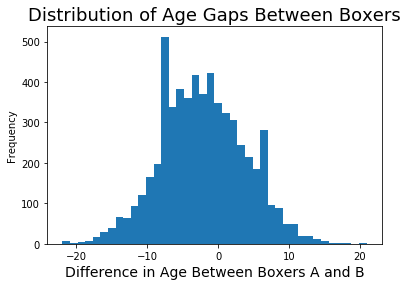

In [8]:
# Explore the distribution of age gaps between the boxers where Boxer A won the match

mask = df['result'] == 'win_A'

df['diff_age'][mask].plot(kind='hist', bins=40)
plt.title('Distribution of Age Gaps Between Boxers', fontsize=18)
plt.xlabel('Difference in Age Between Boxers A and B', fontsize=14)
plt.show()


## EXPLORATORY DATA ANALYSIS: EXPLORE DESCRIPTIVE STATISTICS OF WINNING BOXERS

In [9]:
# Explore the statistics of winning Boxer A's

df.loc[:,['diff_age','diff_height','diff_weight','diff_reach', 'diff_ko_percentage']][mask].describe()

,diff_age,diff_height,diff_weight,diff_reach,diff_ko_percentage
count,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000
mean,-2.081003,0.940655,-0.224932,1.097885,5.918643
std,5.991132,6.801658,14.718452,9.656878,28.411524
min,-22.000000,-25.000000,-115.000000,-34.000000,-100.000000
25%,-6.000000,-3.000000,-1.000000,-5.000000,-10.922630
50%,-2.000000,1.000000,0.000000,1.000000,4.761905
75%,2.000000,5.000000,1.000000,7.000000,22.299331
max,21.000000,24.000000,113.000000,36.000000,100.000000


## EXPLORATORY DATA ANALYSIS: EXPLORE PHYSICAL ATTRIBUTES VS. K.O. PERCENTAGE

In [10]:
def describe_kos(num):
    if num<=20:
        return '0-20'
    elif num<=40:
        return '20-40'
    elif num<=60:
        return '40-60'
    elif num<=80:
        return '60-80'
    else:
        return '80-100'
      
    
df['describe_percent_kos_A'] = df['percent_kos_A'].apply(describe_kos)
df['describe_percent_kos_B'] = df['percent_kos_B'].apply(describe_kos)



Text(0,0.5,'Reach (cm)')

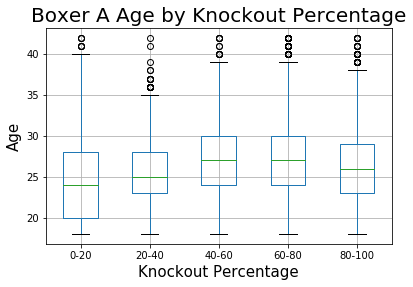

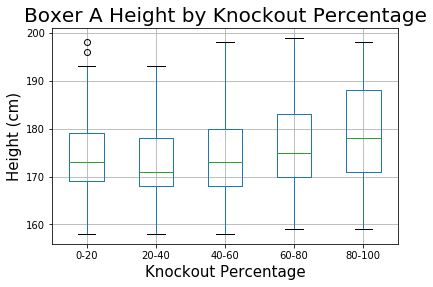

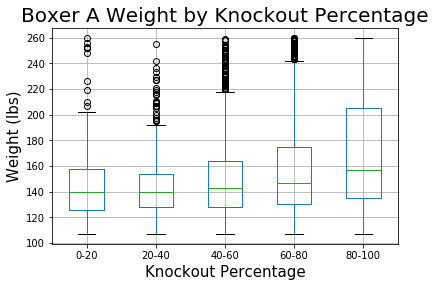

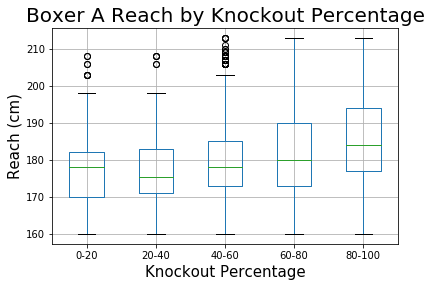

In [11]:
# Create boxplots showing the distributions of Boxer A physical attributes, separated by Boxer A's knockout percentage.

df.boxplot(column = 'age_A', by = 'describe_percent_kos_A')
plt.suptitle('')
plt.title('Boxer A Age by Knockout Percentage', fontsize=20)
plt.xlabel('Knockout Percentage', fontsize=15)
plt.ylabel('Age', fontsize=15)

df.boxplot(column = 'height_A', by = 'describe_percent_kos_A')
plt.suptitle('')
plt.title('Boxer A Height by Knockout Percentage', fontsize=20)
plt.xlabel('Knockout Percentage', fontsize=15)
plt.ylabel('Height (cm)', fontsize=15)

df.boxplot(column = 'weight_A', by = 'describe_percent_kos_A')
plt.suptitle('')
plt.title('Boxer A Weight by Knockout Percentage', fontsize=20)
plt.xlabel('Knockout Percentage', fontsize=15)
plt.ylabel('Weight (lbs)', fontsize=15)

df.boxplot(column = 'reach_A', by = 'describe_percent_kos_A')
plt.suptitle('')
plt.title('Boxer A Reach by Knockout Percentage', fontsize=20)
plt.xlabel('Knockout Percentage', fontsize=15)
plt.ylabel('Reach (cm)', fontsize=15)

## EXPLORATORY DATA ANALYSIS: EXPLORE PHYSICAL ATTRIBUTE DIFFERENTIALS VS. OCCURRENCE OF KNOCKOUTS

In [12]:
# Create a column that characterizes the result of each match

def characterize_result(string):
    
    if string in ['TKO','KO']:
        return 'Knockout'
    elif string in ['UD', 'SD', 'MD']:
        return 'Judge Decision'
    else:
        return 'Other'
    
df['decision_cat'] = df['decision'].apply(characterize_result)

Text(0.5,1,'CDF of Weight Difference vs. the Occurrence of Knockouts')

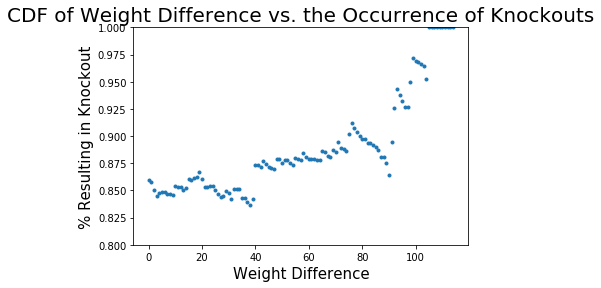

In [13]:
# Create an x-array that contains every differential in the diff_weight column.
# Create a y-array that determines the percentage of matches resulting in knockout.

weight_diffs = np.arange(min(abs(df['diff_weight'])),max(abs(df['diff_weight'])))
weight_winA_percents = np.empty(len(weight_diffs))
    
for index, val in enumerate(weight_diffs):
        
    df_vals = df[abs(df['diff_weight'])>=val]['result'].value_counts()
    if 'win_A' in df_vals.index:
        weight_winA_percents[index] = df_vals.loc['win_A'] / df_vals.sum()
    else:
        weight_winA_percents[index] = 0
        
# Create a scatterplot of the two arrays
        
plt.plot(weight_diffs,weight_winA_percents,marker='.',linestyle='none')
plt.ylim(0.8,1)
plt.xlabel('Weight Difference', fontsize=15)
plt.ylabel('% Resulting in Knockout', fontsize=15)
plt.title('CDF of Weight Difference vs. the Occurrence of Knockouts',fontsize=20)

Text(0.5,1,'CDF of Weight Difference vs. the Occurrence of Knockouts')

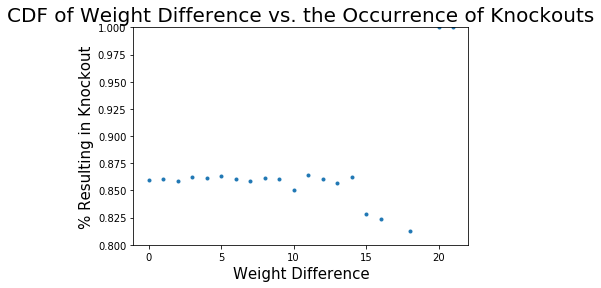

In [14]:
# Create an x-array that contains every differential in the diff_weight column.
# Create a y-array that determines the percentage of matches resulting in knockout.

age_diffs = np.arange(min(abs(df['diff_age'])),max(abs(df['diff_age'])))
age_winA_percents = np.empty(len(age_diffs))
    
for index, val in enumerate(age_diffs):
        
    df_vals = df[abs(df['diff_age'])>=val]['result'].value_counts()
    if 'win_A' in df_vals.index:
        age_winA_percents[index] = df_vals.loc['win_A'] / df_vals.sum()
    else:
        age_winA_percents[index] = 0
        
# Create a scatterplot of the two arrays
        
plt.plot(age_diffs,age_winA_percents,marker='.',linestyle='none')
plt.ylim(0.8,1)
plt.xlabel('Weight Difference', fontsize=15)
plt.ylabel('% Resulting in Knockout', fontsize=15)
plt.title('CDF of Weight Difference vs. the Occurrence of Knockouts',fontsize=20)

Text(0.5,1,'CDF of Height Difference vs. the Occurrence of Knockouts')

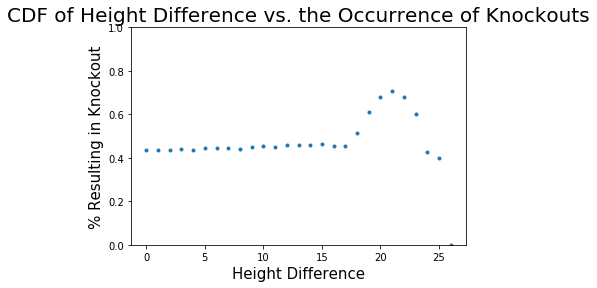

In [15]:
# Create an x-array that contains every differential in the diff_height column.
# Create a y-array that determines the percentage of matches resulting in knockout.

height_diffs = np.arange(min(abs(df['diff_height'])),max(abs(df['diff_height'])))
height_ko_percents = np.empty(len(height_diffs))
    
for index, val in enumerate(height_diffs):
        
    df_vals = df[abs(df['diff_height'])>=val]['decision_cat'].value_counts()
    if 'Knockout' in df_vals.index:
        height_ko_percents[index] = df_vals.loc['Knockout'] / df_vals.sum()
    else:
        height_ko_percents[index] = 0
        
# Create a scatterplot of the two arrays
        
plt.plot(height_diffs,height_ko_percents,marker='.',linestyle='none')
plt.ylim(0,1)
plt.xlabel('Height Difference', fontsize=15)
plt.ylabel('% Resulting in Knockout', fontsize=15)
plt.title('CDF of Height Difference vs. the Occurrence of Knockouts',fontsize=20)

Text(0.5,1,'CDF of Reach Difference vs. the Occurrence of Knockouts')

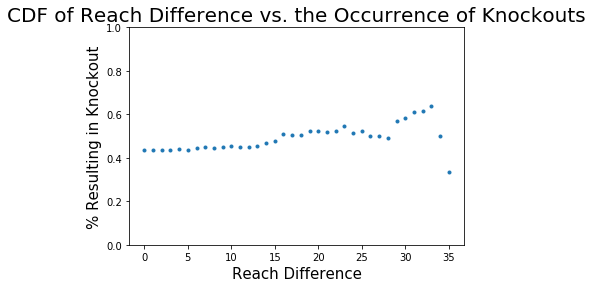

In [16]:
# Create an x-array that contains every differential in the diff_reach column.
# Create a y-array that determines the percentage of matches resulting in knockout.

reach_diffs = np.arange(min(abs(df['diff_reach'])),max(abs(df['diff_reach'])))
reach_ko_percents = np.empty(len(reach_diffs))
    
for index, val in enumerate(reach_diffs):
        
    df_vals = df[abs(df['diff_reach'])>=val]['decision_cat'].value_counts()
    if 'Knockout' in df_vals.index:
        reach_ko_percents[index] = df_vals.loc['Knockout'] / df_vals.sum()
    else:
        reach_ko_percents[index] = 0
        
# Create a scatterplot of the two arrays
        
plt.plot(reach_diffs,reach_ko_percents,marker='.',linestyle='none')
plt.ylim(0,1)
plt.xlabel('Reach Difference', fontsize=15)
plt.ylabel('% Resulting in Knockout', fontsize=15)
plt.title('CDF of Reach Difference vs. the Occurrence of Knockouts',fontsize=20)

## INFERENTIAL STATISTICS: DIFFERENCES IN PHYSICAL ATTRIBUTES

In [17]:
# Define a function for computing permutation samples

def permutation_sample(data1, data2):

    data = np.concatenate((data1, data2))

    permuted_data = np.random.permutation(data)

    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Define a function for computing multiple permutation replicates

def draw_perm_reps(data_1, data_2, func, size=1):

    perm_replicates = np.empty(size)

    for i in range(size):

        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Define a function that computes the difference in sample means

def diff_of_means(sample1, sample2):
    
    diff = np.mean(sample1) - np.mean(sample2)
    
    return diff

# Define a function that runs a permutation hypothesis test between two columns of the DataFrame:
# one where Boxer A is the winner, and the other where Boxer B is the winner

def perm_test_phys(col, comparison = 'less'):
    
    array1 = np.array(df[df['result']=='win_A'][col])
    array2 = np.array(df[df['result']=='win_B'][col])
    
    empirical_diff = diff_of_means(array1, array2)
    
    perm_reps = draw_perm_reps(array1, array2, diff_of_means, size=10000)
    
    if comparison=='less':
        p = np.sum(perm_reps <= empirical_diff) / len(perm_reps)
    elif comparison=='greater':
        p = np.sum(perm_reps >= empirical_diff) / len(perm_reps)
        
    return p
    
    
    
    

In [18]:
### HYPOTHESIS TEST 1: Does the difference in weight have any relationship with the winner of the match?

print('The p-value for this test is:', perm_test_phys('diff_weight'))

The p-value for this test is: 0.6488


In [19]:
### HYPOTHESIS TEST 2: Does the difference in height have any relationship with the winner of the match?

print('The p-value for this test is:', perm_test_phys('diff_height', 'greater'))

The p-value for this test is: 0.0


In [20]:
### HYPOTHESIS TEST 3: Does the difference in reach have any relationship with the winner of the match?

print('The p-value for this test is:', perm_test_phys('diff_reach', 'greater'))

The p-value for this test is: 0.0


In [21]:
### HYPOTHESIS TEST 4: Does the difference in age have any relationship with the winner of the match?

print('The p-value for this test is:', perm_test_phys('diff_age'))

The p-value for this test is: 0.0


In [22]:
### HYPOTHESIS TEST 5: Does the difference in knockout percentage have any relationship with the winner of the match?

print('The p-value for this test is:', perm_test_phys('diff_ko_percentage', 'greater'))

The p-value for this test is: 0.0


## INFERENTIAL STATISTICS: CORRELATION BETWEEN PHYSICAL ATTRIBUTES AND K.O. PERCENTAGE

In [23]:
# Define a function for computing the pearson correlation coefficient between two variables.

def pearson_r(x,y):
    
    corr_mat = np.corrcoef(x,y)

    return corr_mat[0,1]

# Define a function that computes the p-value for a test of correlation

def corr_test(col1, col2):
    
    array1 = np.array(col1)
    array2 = np.array(col2)
    
    r_observed = pearson_r(array1, array2)
    
    perm_reps = np.empty(10000)

    for i in range(10000):
    
        array1_permuted = np.random.permutation(array1)

        perm_reps[i] = pearson_r(array1_permuted, array2)
    
    p = np.sum(perm_reps >= r_observed)/len(perm_reps)
    
    return p

In [24]:
### TESTS OF CORRELATION

print('The p-value for the test of correlation between age and K.O. percentage is:', corr_test(df['age_A'],df['percent_kos_A']))
print('The observed correlation between these two variables is:', pearson_r(df['age_A'],df['percent_kos_A']))

print('The p-value for the test of correlation between height and K.O. percentage is:', corr_test(df['height_A'],df['percent_kos_A']))
print('The observed correlation between these two variables is:', pearson_r(df['height_A'],df['percent_kos_A']))

print('The p-value for the test of correlation between weight and K.O. percentage is:', corr_test(df['weight_A'],df['percent_kos_A']))
print('The observed correlation between these two variables is:', pearson_r(df['weight_A'],df['percent_kos_A']))

print('The p-value for the test of correlation between reach and K.O. percentage is:', corr_test(df['reach_A'],df['percent_kos_A']))
print('The observed correlation between these two variables is:', pearson_r(df['reach_A'],df['percent_kos_A']))



The p-value for the test of correlation between age and K.O. percentage is: 0.0
The observed correlation between these two variables is: 0.064353047708055
The p-value for the test of correlation between height and K.O. percentage is: 0.0
The observed correlation between these two variables is: 0.20062860107343466
The p-value for the test of correlation between weight and K.O. percentage is: 0.0
The observed correlation between these two variables is: 0.19464120263765278
The p-value for the test of correlation between reach and K.O. percentage is: 0.0
The observed correlation between these two variables is: 0.21956156950517272


+ As we can see, all four hypothesis tests on correlation between a physical attribute column and knockout percentage were statistically significant. 
+ However, we see that all four observed correlation coefficients are relatively small, bringing practical significance into question. In particular, the correlation between age and knockout percentage is nearly negligible. 
+ The other three correlations, for height, weight, and reach against knockout percentage, are slightly larger. This is perhaps expected, since we would expect taller, heavier, and longer-reaching boxers to accrue more knockouts.

## INFERENTIAL STATISTICS: CORRELATION BETWEEN PHYSICAL ATTRIBUTE DIFFERENTIALS AND PERCENTAGE OF MATCHES RESULTING IN KNOCKOUT

In [ ]:
### TESTS OF CORRELATION

print('The p-value for the test of correlation between the age differentials and the percent of matches resulting in K.O. is:', corr_test(age_diffs, age_ko_percents))
print('The observed correlation between these two variables is:', pearson_r(age_diffs, age_ko_percents))

print('The p-value for the test of correlation between the height differentials and the percent of matches resulting in K.O. is:', corr_test(height_diffs, height_ko_percents))
print('The observed correlation between these two variables is:', pearson_r(height_diffs, height_ko_percents))

print('The p-value for the test of correlation between the weight differentials and the percent of matches resulting in K.O. is:', corr_test(weight_diffs, weight_ko_percents))
print('The observed correlation between these two variables is:', pearson_r(weight_diffs, weight_ko_percents))

print('The p-value for the test of correlation between the reach differentials and the percent of matches resulting in K.O. is:', corr_test(reach_diffs, reach_ko_percents))
print('The observed correlation between these two variables is:', pearson_r(reach_diffs, reach_ko_percents))

+ As we can see, the only hypothesis test that returned a statistically insignificant p-value was the test between height differentials and percentage of matches resulting in knockout. This is unsurprising, since the observed correlation coefficient for these two variables was 0.1038.
+ Unlike our last tests on correlation, the three statsitically significant tests all showed very strong correlations (at least 0.62)
+ In conclusion, as one boxer becomes singificantly older, heavier, and/or longer than his opponent, we see an increased likelihood in the match resulting in a knockout.

## Machine Learning: Using numerical columns to predict the winner of the match

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve
from sklearn.preprocessing import scale
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids

In [27]:
# Split the data into a training set and testing set

X = df[['diff_age','diff_height','diff_reach', 'diff_ko_percentage']].values
y = (df['result'] == 'win_A').values

ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_sample(X,y)
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size = 0.3, random_state=42)

sm = SMOTE(random_state=12, ratio=1.0)
X_sm, y_sm = sm.fit_sample(X,y)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.3, random_state=42)

cc = ClusterCentroids(random_state=15)
X_cc, y_cc = cc.fit_sample(X,y)
X_train_cc, X_test_cc, y_train_cc, y_test_cc = train_test_split(X_cc, y_cc, test_size = 0.3, random_state=42)

C:\Users\Taylor\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [28]:
### Logistic Regression

# Use GridSearch to tune the C parameter, fit to the training data, and predict using the testing data

c_space = np.logspace(-5,8,15)
params = {'C': c_space}

logreg = LogisticRegression()

np.random.seed(42)

logreg_cv = GridSearchCV(logreg, params, cv=5)
logreg_cv.fit(X_train_ros, y_train_ros)

log_pred = logreg_cv.predict(X_test_ros)

# Print the accuracy score and classification report

print('The accuracy score on our test data is:', logreg_cv.score(X_test_ros, y_test_ros))

print(classification_report(y_test_ros, log_pred))

The accuracy score on our test data is: 0.6297243535095197
             precision    recall  f1-score   support

      False       0.64      0.61      0.63      1775
       True       0.62      0.65      0.63      1744

avg / total       0.63      0.63      0.63      3519



In [29]:
### Logistic Regression

# Use GridSearch to tune the C parameter, fit to the training data, and predict using the testing data

c_space = np.logspace(-5,8,15)
params = {'C': c_space}

logreg = LogisticRegression()

np.random.seed(42)

logreg_cv = GridSearchCV(logreg, params, cv=5)
logreg_cv.fit(X_train_sm, y_train_sm)

log_pred = logreg_cv.predict(X_test_sm)

# Print the accuracy score and classification report

print('The accuracy score on our test data is:', logreg_cv.score(X_test_sm, y_test_sm))

print(classification_report(y_test_sm, log_pred))

The accuracy score on our test data is: 0.6371128161409492
             precision    recall  f1-score   support

      False       0.64      0.63      0.64      1775
       True       0.63      0.64      0.64      1744

avg / total       0.64      0.64      0.64      3519



In [30]:
### Logistic Regression

# Use GridSearch to tune the C parameter, fit to the training data, and predict using the testing data

c_space = np.logspace(-5,8,15)
params = {'C': c_space}

logreg = LogisticRegression()

np.random.seed(42)

logreg_cv = GridSearchCV(logreg, params, cv=5)
logreg_cv.fit(X_train_cc, y_train_cc)

log_pred = logreg_cv.predict(X_test_cc)

# Print the accuracy score and classification report

print('The accuracy score on our test data is:', logreg_cv.score(X_test_cc, y_test_cc))

print(classification_report(y_test_cc, log_pred))

The accuracy score on our test data is: 0.6128472222222222
             precision    recall  f1-score   support

      False       0.62      0.60      0.61       290
       True       0.61      0.63      0.62       286

avg / total       0.61      0.61      0.61       576



In [31]:
### Decision tree

tree = DecisionTreeClassifier()

# Fit the decision tree to the training data

tree.fit(X_train_ros, y_train_ros)

tree_pred = tree.predict(X_test_ros)

# Print the accuracy score and classification report

print('The accuracy score on our test data is:', tree.score(X_test_ros, y_test_ros))

print(classification_report(y_test_ros, tree_pred))

The accuracy score on our test data is: 0.9190110826939472
             precision    recall  f1-score   support

      False       0.87      0.99      0.93      1775
       True       0.99      0.85      0.91      1744

avg / total       0.93      0.92      0.92      3519



In [32]:
### Decision tree

tree = DecisionTreeClassifier()

# Fit the decision tree to the training data

tree.fit(X_train_sm, y_train_sm)

tree_pred = tree.predict(X_test_sm)

# Print the accuracy score and classification report

print('The accuracy score on our test data is:', tree.score(X_test_sm, y_test_sm))

print(classification_report(y_test_sm, tree_pred))

The accuracy score on our test data is: 0.8653026427962489
             precision    recall  f1-score   support

      False       0.85      0.88      0.87      1775
       True       0.88      0.85      0.86      1744

avg / total       0.87      0.87      0.87      3519



In [33]:
### Decision tree

tree = DecisionTreeClassifier()

# Fit the decision tree to the training data

tree.fit(X_train_cc, y_train_cc)

tree_pred = tree.predict(X_test_cc)

# Print the accuracy score and classification report

print('The accuracy score on our test data is:', tree.score(X_test_cc, y_test_cc))

print(classification_report(y_test_cc, tree_pred))

The accuracy score on our test data is: 0.7239583333333334
             precision    recall  f1-score   support

      False       0.72      0.74      0.73       290
       True       0.73      0.70      0.72       286

avg / total       0.72      0.72      0.72       576



In [ ]:
### SVM

# Use GridSearch to tune the C, kernel, and gamma parameters, fit to the training data, and predict using the testing data.

c_space = [0.1, 1, 10, 100]
kernel_space = ['linear', 'rbf']
gamma_space = [0.1, 1, 10, 100]

params = {'C': c_space, 'kernel': kernel_space, 'gamma': gamma_space}

svc = SVC()

np.random.seed(42)

svc_cv = GridSearchCV(svc, params, cv=5)
svc_cv.fit(X_train_ros, y_train_ros)

svc_pred = logreg_cv.predict(X_test_ros)

# Print the accuracy score and classification report

print('The accuracy score on our test data is:', svc_cv.score(X_test_ros, y_test_ros))

print(classification_report(y_test_ros, svc_pred))

In [ ]:
### SVM

# Use GridSearch to tune the C, kernel, and gamma parameters, fit to the training data, and predict using the testing data.

c_space = [1,2,3,4,5,6,7,8,9,10]
kernel_space = ['rbf','linear']
gamma_space = [0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5]

params = {'C': c_space, 'kernel': kernel_space, 'gamma': gamma_space}

svc = SVC()

np.random.seed(42)

svc_cv = GridSearchCV(svc, params, cv=5)
svc_cv.fit(X_train_sm, y_train_sm)

svc_pred = logreg_cv.predict(X_test_sm)

# Print the accuracy score and classification report

print('The accuracy score on our test data is:', svc_cv.score(X_test_sm, y_test_sm))

print(classification_report(y_test_sm, svc_pred))

In [ ]:
### SVM

# Use GridSearch to tune the C, kernel, and gamma parameters, fit to the training data, and predict using the testing data.

c_space = [1,2,3,4,5,6,7,8,9,10]
kernel_space = ['rbf','linear']
gamma_space = [0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5]

params = {'C': c_space, 'kernel': kernel_space, 'gamma': gamma_space}

svc = SVC()

np.random.seed(42)

svc_cv = GridSearchCV(svc, params, cv=5)
svc_cv.fit(X_train_cc, y_train_cc)

svc_pred = logreg_cv.predict(X_test_cc)

# Print the accuracy score and classification report

print('The accuracy score on our test data is:', svc_cv.score(X_test_cc, y_test_cc))

print(classification_report(y_test_cc, svc_pred))